# HMI down

In [1]:
from setproctitle import setproctitle

setproctitle("HMI")

In [2]:
import os
import glob
import drms
from datetime import datetime, timedelta

In [3]:
jsoc_email = 'mgjeon@khu.ac.kr'
client = drms.Client(email=jsoc_email, verbose=True)

In [4]:
year = 2012
month = 3
day = 7
hour = 10
minute = 55

start_time = datetime(year, month, day, hour, minute)
start_time

datetime.datetime(2012, 3, 7, 10, 55)

In [5]:
ar_mapping = client.query('hmi.Mharp_720s[][%sZ]' % start_time.isoformat('_', timespec='seconds'),
                           key=['NOAA_AR', 'HARPNUM'])
ar_mapping

,NOAA_AR,HARPNUM
0,11423,1422
1,11427,1425
2,0,1441
3,0,1445
4,0,1446
5,11428,1447
6,11429,1449
7,11431,1455
8,0,1456
9,0,1457


In [6]:
noaa_nums = [11429]

nums = []

if len(ar_mapping) !=0:
    for noaa_num in noaa_nums:
        harpnum = ar_mapping[ar_mapping['NOAA_AR'] == int(noaa_num)]['HARPNUM']
        if len(harpnum) > 0:
            num_dict = {'NOAA_AR':noaa_num, 'HARPNUM':harpnum.iloc[0]}
            nums.append(num_dict)

nums

[{'NOAA_AR': 11429, 'HARPNUM': 1449}]

In [7]:
pick_num = nums[0]
pick_num

{'NOAA_AR': 11429, 'HARPNUM': 1449}

In [8]:
download_dir = f"NOAA_{pick_num['NOAA_AR']}"
download_dir

'NOAA_11429'

In [9]:
series='sharp_cea_720s'
duration = '0.1h'
segments = 'Br, Bp, Bt'

ds = 'hmi.%s[%d][%s/%s]{%s}' % \
         (series, pick_num['HARPNUM'], start_time.isoformat('_', timespec='seconds'), duration, segments)
ds

'hmi.sharp_cea_720s[1449][2012-03-07_10:55:00/0.1h]{Br, Bp, Bt}'

In [10]:
hmi_dir = os.path.join(download_dir, 'hmi')

In [11]:
r = client.export(ds, protocol='fits')
r.wait()
os.makedirs(hmi_dir, exist_ok=True)
download_result = r.download(hmi_dir)

Export request pending. [id=JSOC_20230711_1890, status=2]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1890, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1890, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1890, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1890, status=1]
Waiting for 5 seconds...
    record: hmi.sharp_cea_720s[1449][2012.03.07_11:00:00_TAI]
  filename: hmi.sharp_cea_720s.1449.20120307_110000_TAI.Bp.fits
  -> NOAA_11429/hmi/hmi.sharp_cea_720s.1449.20120307_110000_TAI.Bp.fits
    record: hmi.sharp_cea_720s[1449][2012.03.07_11:00:00_TAI]
  filename: hmi.sharp_cea_720s.1449.20120307_110000_TAI.Bt.fits
  -> NOAA_11429/hmi/hmi.sharp_cea_720s.1449.20120307_110000_TAI.Bt.fits
    record: hmi.sharp_cea_720s[1449][2012.03.07_11:00:00_TAI]
  filename: hmi.sharp_cea_720s.1449.20120307_110000_TAI.Br.fits
  -> NOAA_11429/hmi/hmi.sharp_cea_720s.1449.20120307_110000_TAI

In [12]:
duration_hour = eval(duration.replace('h', ''))
duration_hour

0.1

In [13]:
end_time = start_time + timedelta(hours=duration_hour)
start_time, end_time

(datetime.datetime(2012, 3, 7, 10, 55), datetime.datetime(2012, 3, 7, 11, 1))

In [14]:
wavelength = 94
ds = f'aia.lev1_euv_12s[{start_time.isoformat("_", timespec="seconds")} / {(end_time - start_time).total_seconds()}s@60s][{wavelength}]{{image}}'
ds

'aia.lev1_euv_12s[2012-03-07_10:55:00 / 360.0s@60s][94]{image}'

In [15]:
aia94_dir = os.path.join(download_dir, 'aia94')

In [16]:
r = client.export(ds, protocol='fits')
r.wait()
os.makedirs(aia94_dir, exist_ok=True)
download_result = r.download(aia94_dir)

Export request pending. [id=JSOC_20230711_1891, status=2]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1891, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1891, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1891, status=1]
Waiting for 5 seconds...
    record: aia.lev1_euv_12s[2012-03-07T10:55:02Z][94]
  filename: aia.lev1_euv_12s.2012-03-07T105504Z.94.image_lev1.fits
  -> NOAA_11429/aia94/aia.lev1_euv_12s.2012-03-07T105504Z.94.image_lev1.fits
    record: aia.lev1_euv_12s[2012-03-07T10:56:02Z][94]
  filename: aia.lev1_euv_12s.2012-03-07T105604Z.94.image_lev1.fits
  -> NOAA_11429/aia94/aia.lev1_euv_12s.2012-03-07T105604Z.94.image_lev1.fits
    record: aia.lev1_euv_12s[2012-03-07T10:57:02Z][94]
  filename: aia.lev1_euv_12s.2012-03-07T105704Z.94.image_lev1.fits
  -> NOAA_11429/aia94/aia.lev1_euv_12s.2012-03-07T105704Z.94.image_lev1.fits
    record: aia.lev1_euv_12s[2012-03-07T10:58:02Z][94]
  filename: aia.

In [ ]:
wavelength = 171
ds = f'aia.lev1_euv_12s[{start_time.isoformat("_", timespec="seconds")} / {(end_time - start_time).total_seconds()}s@60s][{wavelength}]{{image}}'
ds

'aia.lev1_euv_12s[2012-03-07_10:55:00 / 360.0s@60s][171]{image}'

In [18]:
aia171_dir = os.path.join(download_dir, 'aia171')

In [19]:
r = client.export(ds, protocol='fits')
r.wait()
os.makedirs(aia171_dir, exist_ok=True)
download_result = r.download(aia171_dir)

Export request pending. [id=JSOC_20230711_1894, status=2]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1894, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1894, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1894, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230711_1894, status=1]
Waiting for 5 seconds...
    record: aia.lev1_euv_12s[2012-03-07T10:55:02Z][171]
  filename: aia.lev1_euv_12s.2012-03-07T105513Z.171.image_lev1.fits
  -> NOAA_11429/aia171/aia.lev1_euv_12s.2012-03-07T105513Z.171.image_lev1.fits
    record: aia.lev1_euv_12s[2012-03-07T10:56:02Z][171]
  filename: aia.lev1_euv_12s.2012-03-07T105613Z.171.image_lev1.fits
  -> NOAA_11429/aia171/aia.lev1_euv_12s.2012-03-07T105613Z.171.image_lev1.fits
    record: aia.lev1_euv_12s[2012-03-07T10:57:02Z][171]
  filename: aia.lev1_euv_12s.2012-03-07T105713Z.171.image_lev1.fits
  -> NOAA_11429/aia171/aia.lev1_euv_12s.2012-03-07T1057

In [20]:
from sunpy.map import Map
import matplotlib.pyplot as plt

In [22]:
hmi_r = glob.glob(os.path.join(hmi_dir, '*110000_TAI.Br.fits'))[0]
hmi_r

'NOAA_11429/hmi/hmi.sharp_cea_720s.1449.20120307_110000_TAI.Br.fits'

In [23]:
r_map = Map(hmi_r)

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


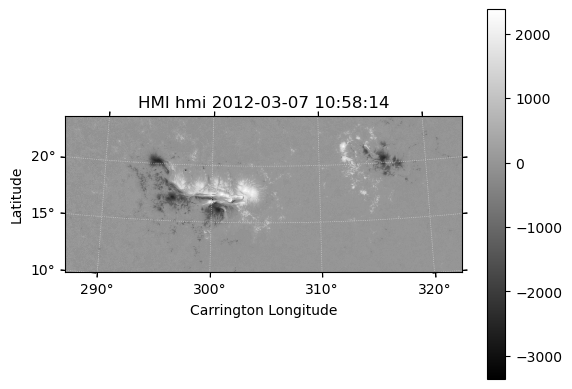

In [24]:
r_map.peek()

In [25]:
ref_wcs = r_map.wcs
ref_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'CRLN-CEA'  'CRLT-CEA'  
CRVAL : 304.80899  17.5305004  
CRPIX : 584.0  230.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.0299999993  0.0299999993  
NAXIS : 1167  460

In [26]:
def aia_draw(path, ref_wcs, wavelength):
    aia_map = Map(path)
    aia_map.peek()
    obstime = aia_map.observer_coordinate.obstime
    obstime.format = 'iso'
    aia_repro_map = aia_map.reproject_to(ref_wcs)

    fig = plt.figure()
    ax = fig.add_subplot(projection=aia_repro_map)
    aia_repro_map.plot(axes=ax)
    plt.colorbar()
    plt.title(f"AIA {wavelength} Å {obstime.value}")
    plt.show()

In [28]:
aia171 = glob.glob(os.path.join(aia171_dir, '*1100*'))[0]
aia171

'NOAA_11429/aia171/aia.lev1_euv_12s.2012-03-07T110013Z.171.image_lev1.fits'

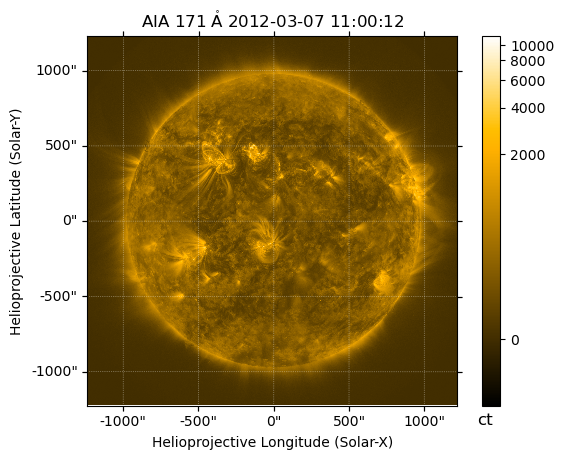

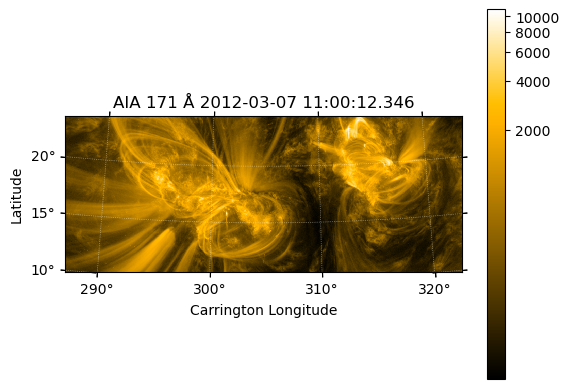

In [29]:
aia_draw(aia171, ref_wcs, '171')

In [30]:
aia94 = glob.glob(os.path.join(aia94_dir, '*1100*'))[0]
aia94

'NOAA_11429/aia94/aia.lev1_euv_12s.2012-03-07T110004Z.94.image_lev1.fits'

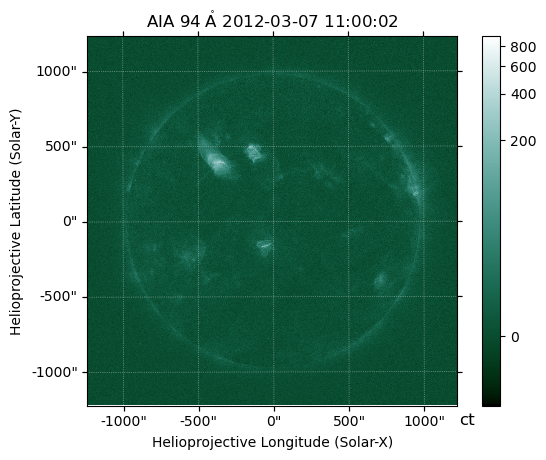

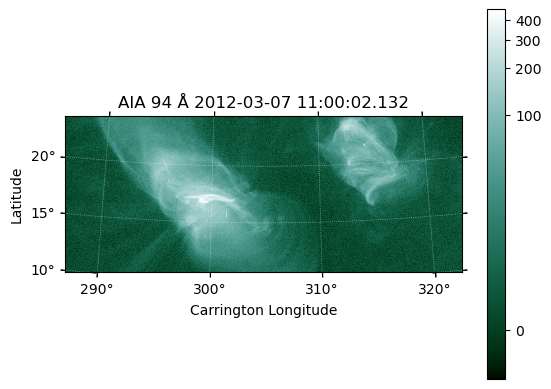

In [31]:
aia_draw(aia94, ref_wcs, '94')